In [329]:
import yfinance as yf
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd

# Closing Prices of Portfolio Stocks

In [330]:
#define variables
PORTFOLIO = ['AMGN', 'NEE', 'NVDA', 'MCD', 'V']

#define variables
INITIAL_INVESTMENT = 100000

#define time period
START = datetime.datetime(2020, 1, 1)
END = datetime.datetime(2023, 12, 31)
YEARS = (END - START).days / 365.25

#load data into a pandas dataframe
portfolio_data = yf.download(PORTFOLIO, start=START, end=END)['Adj Close']
portfolio_data.head

[*********************100%%**********************]  5 of 5 completed


<bound method NDFrame.head of                   AMGN         MCD        NEE        NVDA           V
Date                                                                 
2020-01-02  210.685303  182.138733  54.088089   59.741241  185.551483
2020-01-03  209.255005  181.494690  54.473442   58.785027  184.075775
2020-01-06  210.860809  183.535721  54.745434   59.031551  183.677719
2020-01-07  208.877670  183.807831  54.697842   59.746208  183.192276
2020-01-08  209.035614  186.783173  54.672905   59.858269  186.328201
...                ...         ...        ...         ...         ...
2023-12-22  281.955841  290.049744  59.208061  488.277069  257.949005
2023-12-26  281.697845  291.203156  59.663887  492.766907  258.677643
2023-12-27  284.307465  292.883606  60.030537  494.146820  258.448059
2023-12-28  286.222473  294.166321  60.466541  495.196777  259.915344
2023-12-29  285.785889  294.832550  60.189083  495.196777  259.865448

[1006 rows x 5 columns]>

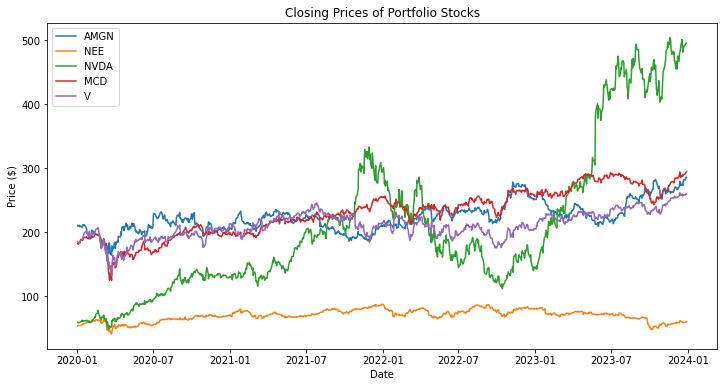

In [331]:
#plot closing prices of individual stocks
plt.figure(figsize=(12, 6))

for stock in PORTFOLIO:
    plt.plot(portfolio_data[stock], label=stock)

plt.title('Closing Prices of Portfolio Stocks')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Portfolio returns

In [332]:
#calculate daily returns
portfolio_returns = portfolio_data.pct_change().dropna()
portfolio_returns.head

<bound method NDFrame.head of                 AMGN       MCD       NEE      NVDA         V
Date                                                        
2020-01-03 -0.006789 -0.003536  0.007125 -0.016006 -0.007953
2020-01-06  0.007674  0.011246  0.004993  0.004194 -0.002162
2020-01-07 -0.009405  0.001483 -0.000869  0.012106 -0.002643
2020-01-08  0.000756  0.016187 -0.000456  0.001876  0.017118
2020-01-09  0.002980  0.011850  0.007836  0.010983  0.006930
...              ...       ...       ...       ...       ...
2023-12-22  0.017291  0.001064  0.002517 -0.003266 -0.004277
2023-12-26 -0.000915  0.003977  0.007699  0.009195  0.002825
2023-12-27  0.009264  0.005771  0.006145  0.002800 -0.000888
2023-12-28  0.006736  0.004380  0.007263  0.002125  0.005677
2023-12-29 -0.001525  0.002265 -0.004589  0.000000 -0.000192

[1005 rows x 5 columns]>

[*********************100%%**********************]  1 of 1 completed


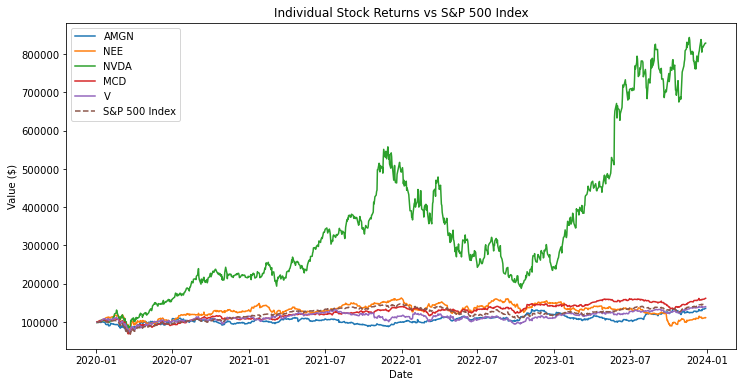

In [333]:
#plot individual stock returns vs S&P index
spy_data = yf.download('^GSPC', start=START, end=END)['Adj Close']
spy_returns = spy_data.pct_change()

plt.figure(figsize=(12, 6))

# Plot individual stock returns
for stock in PORTFOLIO:
    stock_return = (portfolio_returns[stock] + 1).cumprod() * INITIAL_INVESTMENT
    plt.plot(stock_return, label=stock)

# Plot S&P 500 index returns
spy_value = (spy_returns + 1).cumprod() * INITIAL_INVESTMENT
plt.plot(spy_value, label='S&P 500 Index', linestyle='--')

plt.title('Individual Stock Returns vs S&P 500 Index')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.legend()
plt.show()

# Weighed OVERALL returns vs S&P

In [334]:
# Define new weights
portfolio_weights = np.array([0.22895145, 0.20811738, -0.01282545, 0.43571095, 0.14004567])

# Print portfolio weights along with stock names
print("Portfolio weights:")
for stock, weight in zip(PORTFOLIO, portfolio_weights):
    print(f"{stock:<6}: {weight:.2f}")

Portfolio weights:
AMGN  : 0.23
NEE   : 0.21
NVDA  : -0.01
MCD   : 0.44
V     : 0.14


In [335]:
# Calculate weighted portfolio return
portfolio_returns['Portfolio'] = portfolio_returns.dot(portfolio_weights)

#calculate portfolio value
portfolio_value = (portfolio_returns['Portfolio'] + 1).cumprod() * INITIAL_INVESTMENT
portfolio_value.head

<bound method NDFrame.head of Date
2020-01-03     98953.065740
2020-01-06     99503.019092
2020-01-07     99808.609437
2020-01-08    100483.552371
2020-01-09    101368.199998
                  ...      
2023-12-22    352231.815199
2023-12-26    353965.301135
2023-12-27    355501.154984
2023-12-28    356952.076500
2023-12-29    357007.077293
Name: Portfolio, Length: 1005, dtype: float64>

[*********************100%%**********************]  1 of 1 completed


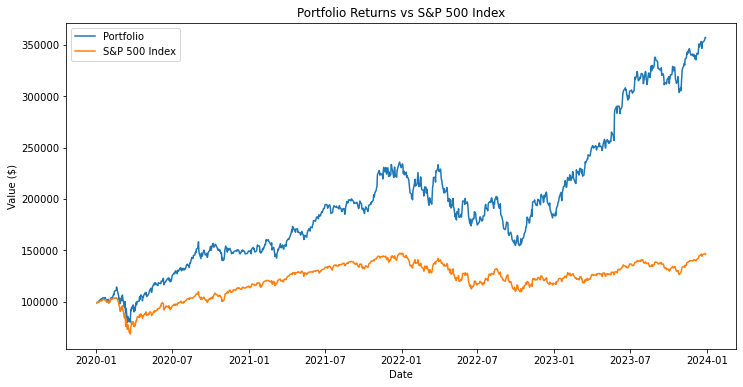

In [361]:
#plot portfolio returns vs S&P index
spy_data = yf.download('^GSPC', start=START, end=END)['Adj Close']
spy_returns = spy_data.pct_change()
spy_value = (spy_returns + 1).cumprod() * INITIAL_INVESTMENT
spy_value = spy_value.dropna()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot portfolio returns vs S&P index
plt.plot(portfolio_value, label='Portfolio')
plt.plot(spy_value, label='S&P 500 Index')

plt.title('Portfolio Returns vs S&P 500 Index')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.legend()
plt.show()

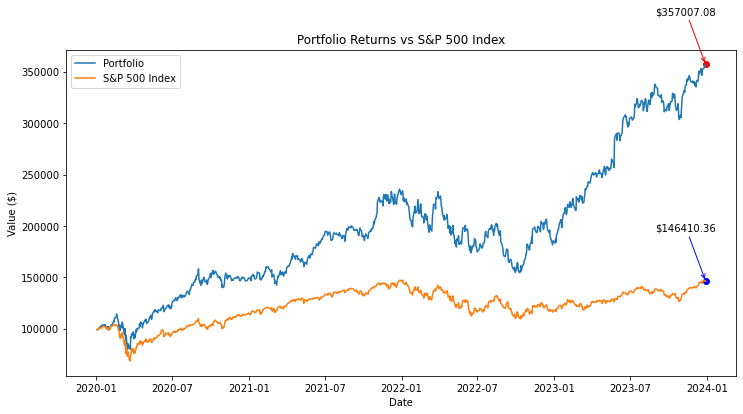

In [362]:
# Get the final values
final_portfolio_value = portfolio_value[-1]
final_spy_value = spy_value[-1]

plt.figure(figsize=(12, 6))

# Plot portfolio returns vs S&P index
plt.plot(portfolio_value, label='Portfolio')
plt.plot(spy_value, label='S&P 500 Index')

# Mark final portfolio value on the graph
plt.scatter(portfolio_value.index[-1], final_portfolio_value, color='red')
plt.annotate(f'${final_portfolio_value:.2f}', (portfolio_value.index[-1], final_portfolio_value), xytext=(-50, 50), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))

# Mark final S&P 500 index value on the graph
plt.scatter(spy_value.index[-1], final_spy_value, color='blue')
plt.annotate(f'${final_spy_value:.2f}', (spy_value.index[-1], final_spy_value), xytext=(-50, 50), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='blue'))

plt.title('Portfolio Returns vs S&P 500 Index')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.legend()
plt.show()

# SMA and trading signals

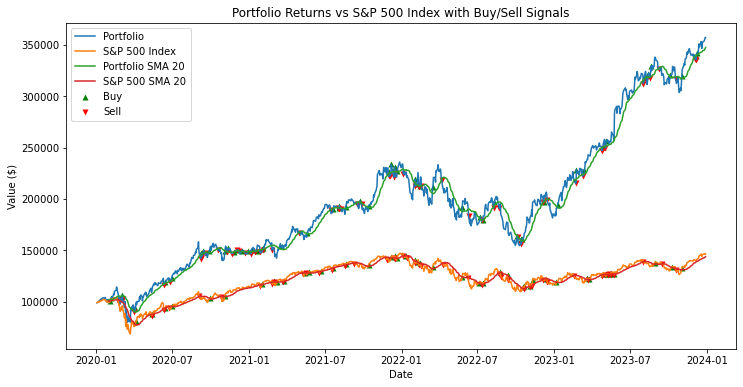

In [338]:
# Calculate simple moving averages
window_size = 20
portfolio_sma_20 = portfolio_value.rolling(window=window_size).mean()
spy_sma_20 = spy_value.rolling(window=window_size).mean()

# Generate buy/sell signals
portfolio_signals = pd.DataFrame(index=portfolio_value.index)
portfolio_signals['signal'] = 0.0

portfolio_signals['signal'][window_size:] = np.where(portfolio_value[window_size:] > portfolio_sma_20[window_size:], 1.0, 0.0)
portfolio_signals['positions'] = portfolio_signals['signal'].diff()

spy_signals = pd.DataFrame(index=spy_value.index)
spy_signals['signal'] = 0.0
spy_signals['signal'][window_size:] = np.where(spy_value[window_size:] > spy_sma_20[window_size:], 1.0, 0.0)
spy_signals['positions'] = spy_signals['signal'].diff()

# Plot buy/sell signals
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(portfolio_value, label='Portfolio')
ax.plot(spy_value, label='S&P 500 Index')
ax.plot(portfolio_sma_20, label='Portfolio SMA 20')
ax.plot(spy_sma_20, label='S&P 500 SMA 20')
ax.scatter(portfolio_signals.loc[portfolio_signals.positions == 1.0].index, portfolio_value.reindex(portfolio_signals.loc[portfolio_signals.positions == 1.0].index), marker='^', color='g', label='Buy', lw=0)
ax.scatter(portfolio_signals.loc[portfolio_signals.positions == -1.0].index, portfolio_value.reindex(portfolio_signals.loc[portfolio_signals.positions == -1.0].index), marker='v', color='r', label='Sell', lw=0)
ax.scatter(spy_signals.loc[spy_signals.positions == 1.0].index, spy_value.reindex(spy_signals.loc[spy_signals.positions == 1.0].index), marker='^', color='g', lw=0)
ax.scatter(spy_signals.loc[spy_signals.positions == -1.0].index, spy_value.reindex(spy_signals.loc[spy_signals.positions == -1.0].index), marker='v', color='r', lw=0)
ax.set_title('Portfolio Returns vs S&P 500 Index with Buy/Sell Signals')
ax.set_xlabel('Date')
ax.set_ylabel('Value ($)')
ax.legend()
plt.show()

# Cumulative returns

In [339]:
# Calculate cumulative returns
portfolio_cum_returns = (portfolio_value[-1] / portfolio_value[0] - 1)
spy_cum_returns = spy_value[-1] / spy_value[0] - 1

print(f"Portfolio Cumulative Returns: {portfolio_cum_returns * 100:.2f}%")
print(f"S&P 500 Cumulative Returns: {spy_cum_returns * 100:.2f}%")

Portfolio Cumulative Returns: 260.78%
S&P 500 Cumulative Returns: 47.45%


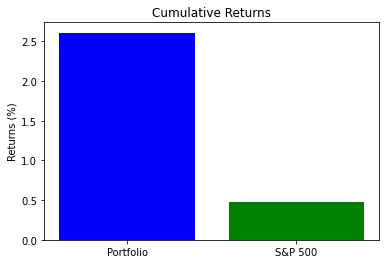

In [340]:
# Plotting cumulative returns
plt.bar(['Portfolio', 'S&P 500'], [portfolio_cum_returns, spy_cum_returns], color=['blue', 'green'])
plt.title('Cumulative Returns')
plt.ylabel('Returns (%)')
plt.show()

# Annualized returns

In [341]:
# Calculate annualized returns
portfolio_ann_returns = (portfolio_value[-1] / portfolio_value[0]) ** (1 / YEARS) - 1
spy_ann_returns = (spy_value[-1] / spy_value[0]) ** (1 / YEARS) - 1

print(f"Portfolio Annualized Returns: {portfolio_ann_returns * 100:.2f}%")
print(f"S&P 500 Annualized Returns: {spy_ann_returns * 100:.2f}%")

Portfolio Annualized Returns: 37.85%
S&P 500 Annualized Returns: 10.20%


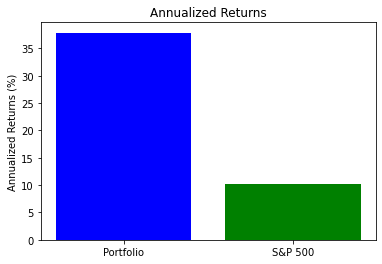

In [342]:
# Plotting annualized returns
plt.bar(['Portfolio', 'S&P 500'], [portfolio_ann_returns * 100, spy_ann_returns * 100], color=['blue', 'green'])
plt.title('Annualized Returns')
plt.ylabel('Annualized Returns (%)')
plt.show()

# Volatility

In [369]:
# Calculate volatility
portfolio_volatility = portfolio_returns['Portfolio'].std() * np.sqrt(252)
spy_volatility = spy_returns.std() * np.sqrt(252)

print(f"Portfolio Volatility: {portfolio_volatility * 100:.2f}%")
print(f"S&P 500 Volatility: {spy_volatility * 100:.2f}%")

Portfolio Volatility: 31.47%
S&P 500 Volatility: 23.01%


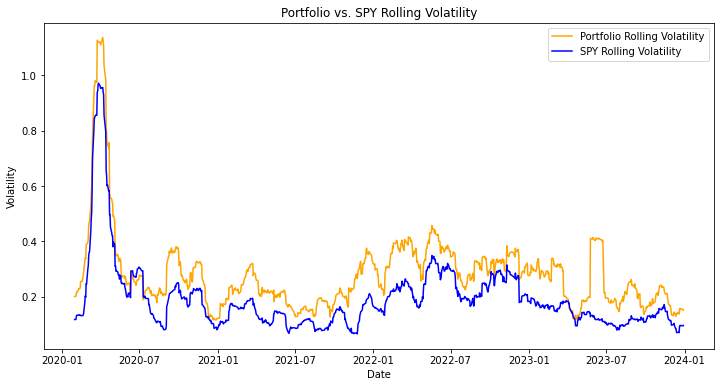

In [368]:
# Calculate rolling volatility
portfolio_rolling_volatility = portfolio_returns['Portfolio'].rolling(window=window_size).std() * np.sqrt(252)
spy_rolling_volatility = spy_returns.rolling(window=window_size).std() * np.sqrt(252)

# Plot portfolio vs SPY rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(portfolio_rolling_volatility, label='Portfolio Rolling Volatility', color='orange')
plt.plot(spy_rolling_volatility, label='SPY Rolling Volatility', color='blue')
plt.title('Portfolio vs. SPY Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Sharpe Ratio

In [345]:
# Calculate Sharpe Ratio
risk_free_rate = 0.02  # Assuming a 2% risk-free rate
portfolio_sharpe_ratio = (portfolio_ann_returns - risk_free_rate) / portfolio_volatility
spy_sharpe_ratio = (spy_ann_returns - risk_free_rate) / spy_volatility

print(f"Portfolio Sharpe Ratio: {portfolio_sharpe_ratio:.2f}")
print(f"S&P 500 Sharpe Ratio: {spy_sharpe_ratio:.2f}")

Portfolio Sharpe Ratio: 1.14
S&P 500 Sharpe Ratio: 0.36


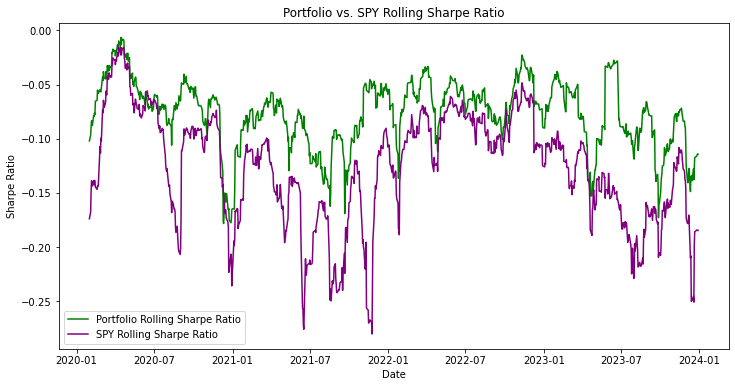

In [364]:
plt.figure(figsize=(12, 6))
portfolio_rolling_sharpe = (portfolio_returns['Portfolio'].rolling(window=window_size).mean() - risk_free_rate) / portfolio_rolling_volatility
spy_rolling_sharpe = (spy_returns.rolling(window=window_size).mean() - risk_free_rate) / spy_rolling_volatility
plt.plot(portfolio_rolling_sharpe, label='Portfolio Rolling Sharpe Ratio', color='green')
plt.plot(spy_rolling_sharpe, label='SPY Rolling Sharpe Ratio', color='purple')
plt.title('Portfolio vs. SPY Rolling Sharpe Ratio')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.show()

# Sortino Ratio

In [347]:
# Calculate Sortino Ratio
portfolio_downside_deviation = portfolio_returns['Portfolio'][portfolio_returns['Portfolio'] < 0].std() * np.sqrt(252)
portfolio_sortino_ratio = (portfolio_ann_returns - risk_free_rate) / portfolio_downside_deviation

spy_downside_deviation = spy_returns[spy_returns < 0].std() * np.sqrt(252)
spy_sortino_ratio = (spy_ann_returns - risk_free_rate) / spy_downside_deviation

print(f"Portfolio Sortino Ratio: {portfolio_sortino_ratio:.2f}")
print(f"SPY Sortino Ratio: {spy_sortino_ratio:.2f}")

Portfolio Sortino Ratio: 1.63
SPY Sortino Ratio: 0.44


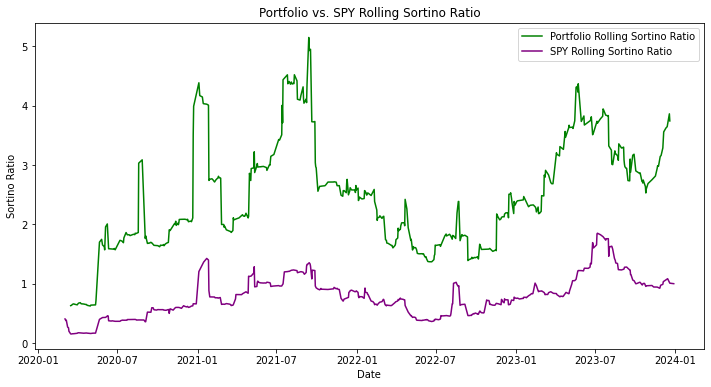

In [365]:
# Calculate downside deviation for portfolio and SPY returns
portfolio_downside_deviation = portfolio_returns['Portfolio'][portfolio_returns['Portfolio'] < 0].rolling(window=window_size).std() * np.sqrt(252)
spy_downside_deviation = spy_returns[spy_returns < 0].rolling(window=window_size).std() * np.sqrt(252)

# Calculate rolling Sortino ratio
portfolio_rolling_sortino = (portfolio_ann_returns - risk_free_rate) / portfolio_downside_deviation
spy_rolling_sortino = (spy_ann_returns - risk_free_rate) / spy_downside_deviation

# Plot the rolling Sortino ratio
plt.figure(figsize=(12, 6))
plt.plot(portfolio_rolling_sortino, label='Portfolio Rolling Sortino Ratio', color='green')
plt.plot(spy_rolling_sortino, label='SPY Rolling Sortino Ratio', color='purple')
plt.title('Portfolio vs. SPY Rolling Sortino Ratio')
plt.xlabel('Date')
plt.ylabel('Sortino Ratio')
plt.legend()
plt.show()

# Treynor Ratio and Covariance Matrix

In [349]:
# Assuming a risk-free rate of 2%
risk_free_rate = 0.02

# Calculate excess returns
portfolio_excess_returns = portfolio_returns['Portfolio'] - risk_free_rate
spy_excess_returns = spy_returns - risk_free_rate

# Drop NaNs from excess returns data
portfolio_excess_returns = portfolio_excess_returns.dropna()
spy_excess_returns = spy_excess_returns.dropna()

# Calculate covariance matrix
covariance_matrix = np.cov(portfolio_excess_returns, spy_excess_returns)

# Calculate systematic risk (beta) for the portfolio
portfolio_covariance = covariance_matrix[0, 0]
portfolio_beta = covariance_matrix[0, 1] / portfolio_covariance

# Calculate Treynor Ratio for the portfolio
portfolio_treynor_ratio = (portfolio_ann_returns - risk_free_rate) / portfolio_beta

# Calculate systematic risk (beta) for the S&P 500
spy_covariance = covariance_matrix[1, 1]
spy_beta = covariance_matrix[0, 1] / spy_covariance

# Calculate Treynor Ratio for the S&P 500
spy_treynor_ratio = (spy_ann_returns - risk_free_rate) / spy_beta

# Print Treynor Ratios
print(f"Portfolio Treynor Ratio: {portfolio_treynor_ratio:.2f}")
print(f"S&P 500 Treynor Ratio: {spy_treynor_ratio:.2f}")

Portfolio Treynor Ratio: 0.57
S&P 500 Treynor Ratio: 0.07


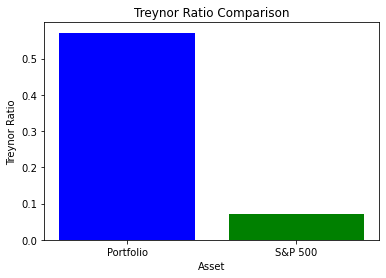

In [350]:
import matplotlib.pyplot as plt

# Define data for the bar chart
treynor_ratios = [portfolio_treynor_ratio, spy_treynor_ratio]
labels = ['Portfolio', 'S&P 500']

# Plotting bar chart
plt.bar(labels, treynor_ratios, color=['blue', 'green'])
plt.title('Treynor Ratio Comparison')
plt.xlabel('Asset')
plt.ylabel('Treynor Ratio')
plt.show()

In [351]:
covariance_df = pd.DataFrame(covariance_matrix, columns=['Portfolio Returns', 'S&P 500 Returns'], index=['Portfolio Returns', 'S&P 500 Returns'])

# Print covariance matrix
print("Covariance Matrix:")
print(covariance_df)

Covariance Matrix:
                   Portfolio Returns  S&P 500 Returns
Portfolio Returns           0.000393         0.000247
S&P 500 Returns             0.000247         0.000210


# Maximum drawdown

In [352]:
# Calculate maximum drawdown
portfolio_drawdown = (portfolio_value / portfolio_value.cummax() - 1).min()
spy_drawdown = (spy_value / spy_value.cummax() - 1).min()

print(f"Portfolio Maximum Drawdown: {portfolio_drawdown * 100:.2f}%")
print(f"S&P 500 Maximum Drawdown: {spy_drawdown * 100:.2f}%")

Portfolio Maximum Drawdown: -34.47%
S&P 500 Maximum Drawdown: -33.92%


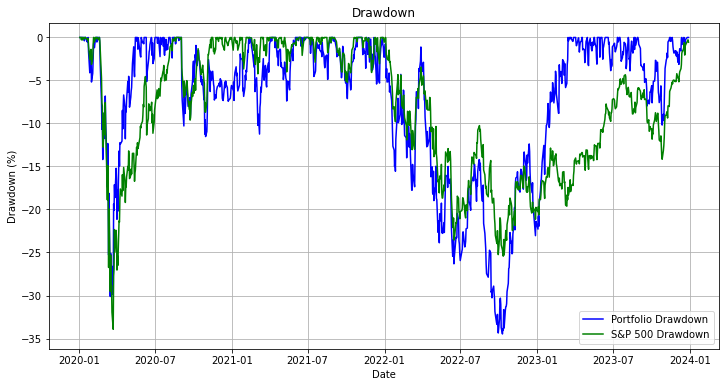

In [367]:
# Calculate maximum drawdown for portfolio and S&P 500
portfolio_drawdown_series = (portfolio_value / portfolio_value.cummax() - 1) * 100
spy_drawdown_series = (spy_value / spy_value.cummax() - 1) * 100

# Plotting drawdown
plt.figure(figsize=(12, 6))
plt.plot(portfolio_drawdown_series, label='Portfolio Drawdown', color='blue')
plt.plot(spy_drawdown_series, label='S&P 500 Drawdown', color='green')
plt.title('Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')
plt.legend()
plt.grid(True)
plt.show()

# Alpha and Beta

In [354]:
# Calculate Alpha and Beta
portfolio_returns_excess = portfolio_returns['Portfolio'] - risk_free_rate / 252
spy_returns_excess = spy_returns - risk_free_rate / 252
cov_matrix = portfolio_returns_excess.cov(spy_returns_excess)
beta = cov_matrix / spy_returns_excess.var()
alpha = portfolio_ann_returns - risk_free_rate - beta * (spy_ann_returns - risk_free_rate)

print(f"Alpha: {alpha * 100:.2f}%")
print(f"Beta: {beta:.2f}")

Alpha: 26.22%
Beta: 1.17


# Upside/Downside Capture Ratios

In [355]:
# Calculate Upside/Downside Capture Ratios
up_portfolio = portfolio_returns['Portfolio'][portfolio_returns['Portfolio'] > 0].sum() / portfolio_returns['Portfolio'].count()
up_spy = spy_returns[spy_returns > 0].sum() / spy_returns.count()
down_portfolio = -portfolio_returns['Portfolio'][portfolio_returns['Portfolio'] < 0].sum() / portfolio_returns['Portfolio'].count()
down_spy = -spy_returns[spy_returns < 0].sum() / spy_returns.count()

upside_capture_ratio = up_portfolio / up_spy
downside_capture_ratio = down_portfolio / down_spy

print(f"Upside Capture Ratio: {upside_capture_ratio:.2f}")
print(f"Downside Capture Ratio: {downside_capture_ratio:.2f}")

Upside Capture Ratio: 1.54
Downside Capture Ratio: 1.38


# Correlation

In [356]:
# Calculate Correlation
correlation = portfolio_returns['Portfolio'].corr(spy_returns)
print(f"Correlation: {correlation:.2f}")

Correlation: 0.86


# Creating a table for comparision

In [359]:
# Define metrics for portfolio and S&P 500
metrics = {
    'Metric': ['Cumulative Returns', 'Annualized Returns', 'Volatility', 'Sharpe Ratio', 'Maximum Drawdown', 'Treynor Ratio', 'Sortino Ratio'],
    'Portfolio': [portfolio_cum_returns * 100, portfolio_ann_returns * 100, portfolio_volatility * 100, portfolio_sharpe_ratio, portfolio_drawdown * 100, portfolio_treynor_ratio, portfolio_sortino_ratio],
    'S&P 500': [spy_cum_returns * 100, spy_ann_returns * 100, spy_volatility * 100, spy_sharpe_ratio, spy_drawdown * 100, spy_treynor_ratio, spy_sortino_ratio]
}

# Create DataFrame
metrics_df = pd.DataFrame(metrics)

# Set Metric column as index
metrics_df.set_index('Metric', inplace=True)

# Print the DataFrame
print(metrics_df)

                     Portfolio    S&P 500
Metric                                   
Cumulative Returns  260.784251  47.451348
Annualized Returns   37.850172  10.202403
Volatility           31.471555  23.013412
Sharpe Ratio          1.139129   0.356418
Maximum Drawdown    -34.472600 -33.924960
Treynor Ratio         0.571151   0.069876
Sortino Ratio         1.634436   0.441878
